In [20]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
from scipy.stats import norm
from sklearn.metrics import f1_score
 
data = loadmat('ex8data1.mat')  
X = data['X']   
# TODO: amount of data
print(X.shape)

(307, 2)


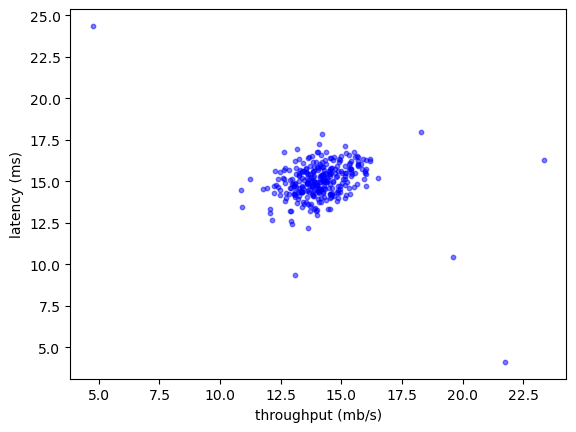

In [21]:
x1 = X[:, 0]
x2 = X[:, 1]

plt.scatter(x1, x2, marker='o', s=10, c='blue', alpha=0.5)
plt.xlabel('throughput (mb/s)')
plt.ylabel('latency (ms)')
plt.show()

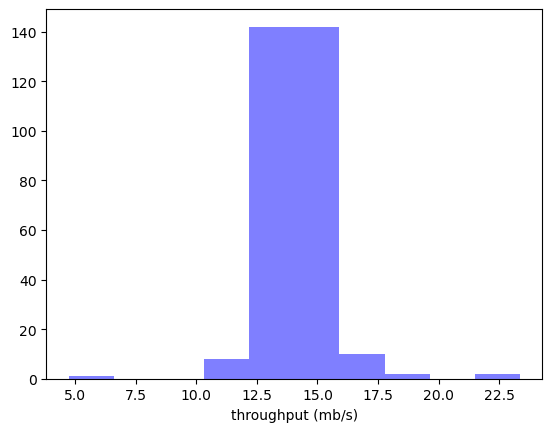

In [22]:
plt.hist(x1, alpha=0.5, color='blue')
plt.xlabel('throughput (mb/s)')
plt.show()

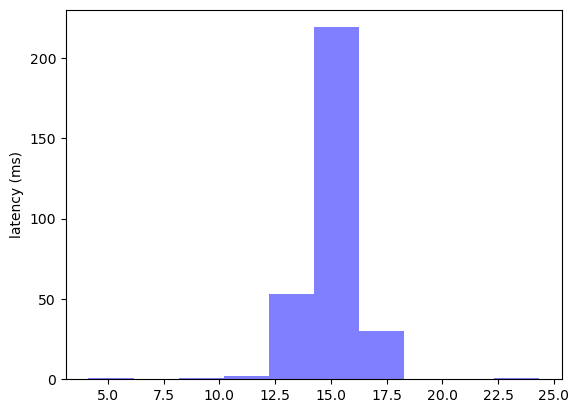

In [23]:
plt.hist(x2, alpha=0.5, color='blue')
plt.ylabel('latency (ms)')
plt.show()

## Rozkład Gaussa

In [24]:
def estimate_gaussian(X):  
    # TODO: calculate mu and sigma
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    return mu, sigma


mu, sigma = estimate_gaussian(X)
print('mu:', mu)
print('sigma:', sigma)

mu: [14.11222578 14.99771051]
sigma: [1.35374717 1.3075723 ]


In [25]:
Xval = data['Xval']  
yval = data['yval']


print("Xval shape:", Xval.shape)
print("Liczba anomalii:", np.sum(yval == 1.0))

Xval shape: (307, 2)
Liczba anomalii: 9


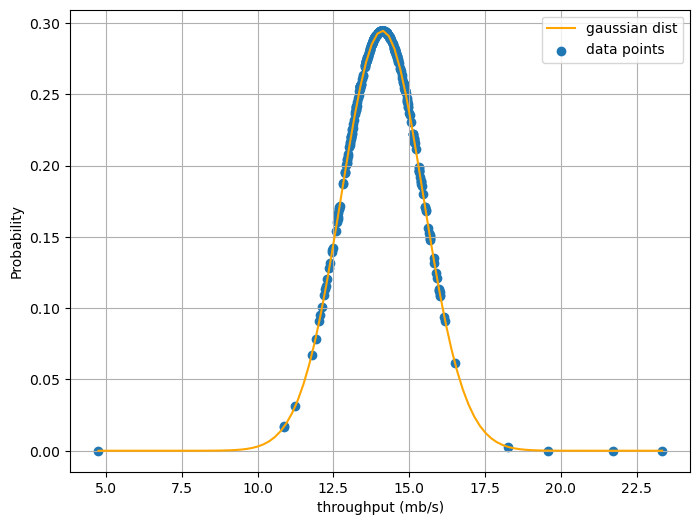

In [26]:
mu1 = mu[0]
sigma1 = sigma[0]
mu2 = mu[1]
sigma2 = sigma[1]

x1_range = np.linspace(x1.min(), x1.max(), 100)
pdf_x1 = norm.pdf(x1_range, loc=mu1, scale=sigma1)

plt.figure(figsize=(8, 6))
plt.plot(x1_range, pdf_x1, color='orange', label='gaussian dist')
plt.scatter(np.sort(x1), norm.pdf(np.sort(x1), loc=mu1, scale=sigma1), label='data points')
plt.xlabel('throughput (mb/s)')
plt.ylabel('Probability')
plt.grid()
plt.legend()
plt.show()

In [27]:
pval = norm.pdf(Xval, loc=mu, scale=sigma)
print("Pval shape:", pval.shape)
print("Pval", pval)

Pval shape: (307, 2)
Pval [[1.36688038e-01 3.04577250e-01]
 [2.77272653e-01 2.95409626e-01]
 [2.52387437e-01 1.61322525e-01]
 [2.73146659e-01 2.26618293e-01]
 [2.62778656e-01 2.70900066e-01]
 [2.03711020e-01 2.08307264e-01]
 [1.99132113e-01 3.02316122e-01]
 [2.91026337e-01 2.88751221e-01]
 [7.95117869e-02 2.65241551e-01]
 [2.53066098e-01 3.04262360e-01]
 [2.76941891e-01 2.88628756e-01]
 [1.40516190e-01 3.03463058e-01]
 [2.10596140e-01 2.51500509e-01]
 [9.82402034e-02 1.48224691e-01]
 [2.58184982e-01 2.10447722e-01]
 [1.92526120e-01 2.28745285e-01]
 [1.74868919e-01 2.49576082e-01]
 [1.89375290e-01 3.01093208e-01]
 [2.87820926e-01 2.64545790e-01]
 [1.90228719e-01 2.40171433e-01]
 [2.94694820e-01 2.96185719e-01]
 [1.87405774e-01 1.86052711e-01]
 [2.77364496e-01 3.05101425e-01]
 [2.92025832e-01 2.47138329e-01]
 [2.67044058e-01 2.75263088e-01]
 [2.82236656e-01 2.93931089e-01]
 [1.91842478e-01 2.28362584e-01]
 [2.78319971e-01 2.56140464e-01]
 [1.62345384e-01 2.61771077e-01]
 [2.22826511e-01 

In [28]:
def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0

    epsilons = np.linspace(pval.min(), pval.max(), 1000)

    for epsilon in epsilons:
        y_pred = (pval < epsilon).astype(int)
        current_f1 = f1_score(yval, y_pred)

        if current_f1 > best_f1:
            best_f1 = current_f1
            best_epsilon = epsilon

    return best_epsilon, best_f1

In [29]:
pval1 = norm.pdf(Xval[:, 0], loc=mu1, scale=sigma1)
pval2 = norm.pdf(Xval[:, 1], loc=mu2, scale=sigma2)


best_epsilon_1, best_f1_1 = select_threshold(pval1, yval.flatten())
best_epsilon_2, best_f1_2 = select_threshold(pval2, yval.flatten())

y_pred1 = (pval1 < best_epsilon_1).astype(int)
y_pred2 = (pval2 < best_epsilon_2).astype(int)


print("Najlepszy próg (1. cecha):", best_epsilon_1)
print("Najlepszy F1-score (1. cecha):", best_f1_1)
print("Najlepszy próg (2. cecha):", best_epsilon_2)
print("Najlepszy F1-score (2. cecha):", best_f1_2)

Najlepszy próg (1. cecha): 0.0005899796186982346
Najlepszy F1-score (1. cecha): 0.8
Najlepszy próg (2. cecha): 0.023210919211410812
Najlepszy F1-score (2. cecha): 0.625


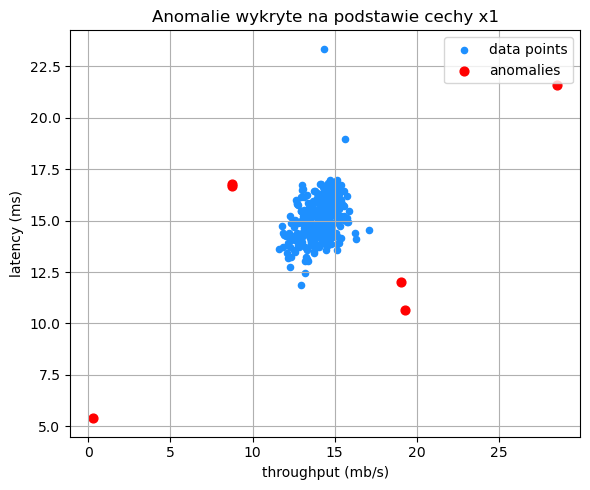

In [30]:
plt.figure(figsize=(6, 5))

# Normalne punkty
plt.scatter(Xval[y_pred1 == 0, 0], Xval[y_pred1 == 0, 1], 
            color='dodgerblue', s=20, label="data points")

# Anomalie wg cechy x1
plt.scatter(Xval[y_pred1 == 1, 0], Xval[y_pred1 == 1, 1], 
            color='red', s=40, label="anomalies")

plt.xlabel("throughput (mb/s)")
plt.ylabel("latency (ms)")
plt.title("Anomalie wykryte na podstawie cechy x1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


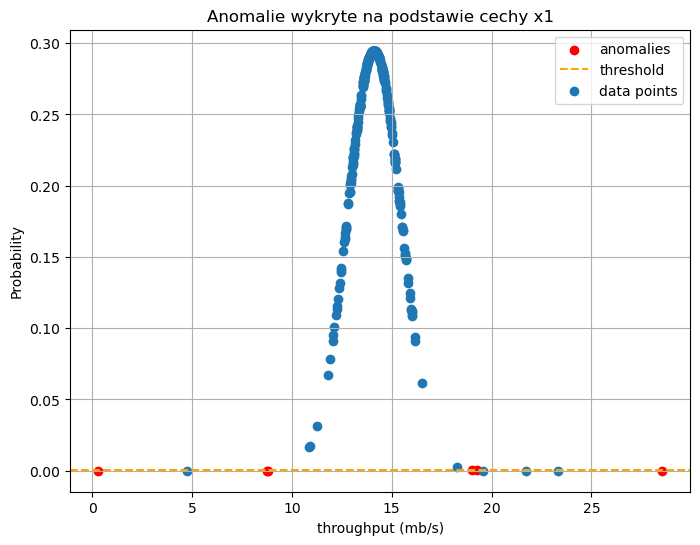

In [31]:
# x1_range = np.linspace(x1.min(), x1.max(), 100)
# pdf_x1 = norm.pdf(x1_range, loc=mu1, scale=sigma1)

# plt.figure(figsize=(8, 6))
# plt.scatter(Xval[y_pred1 == 1, 0], norm.pdf(Xval[y_pred1 == 1, 0], loc=mu1, scale=sigma1),
#             color='red', label="anomalies")
# plt.plot(Xval[y_pred1 == 1, 0], norm.pdf(Xval[y_pred1 == 1, 1], loc=mu1, scale=sigma1), color='orange', label='threshold')
# plt.scatter(np.sort(x1), norm.pdf(np.sort(x1), loc=mu1, scale=sigma1), label='data points')
# plt.xlabel('throughput (mb/s)')
# plt.ylabel('Probability')
# plt.title("Anomalie wykryte na podstawie cechy x1")
# plt.grid()
# plt.legend()
# plt.show()

x1_range = np.linspace(x1.min(), x1.max(), 100)
pdf_x1 = norm.pdf(x1_range, loc=mu1, scale=sigma1)

plt.figure(figsize=(8, 6))

# Anomalie na osi X i odpowiadające im wartości PDF
plt.scatter(Xval[y_pred1 == 1, 0], norm.pdf(Xval[y_pred1 == 1, 0], loc=mu1, scale=sigma1),
            color='red', label="anomalies")

# Linia progu PDF (np. best_epsilon)
plt.axhline(y=best_epsilon_1, color='orange', linestyle='--', label='threshold')

# Wszystkie dane na tle PDF
plt.scatter(np.sort(x1), norm.pdf(np.sort(x1), loc=mu1, scale=sigma1), label='data points')

plt.xlabel('throughput (mb/s)')
plt.ylabel('Probability')
plt.title("Anomalie wykryte na podstawie cechy x1")
plt.grid()
plt.legend()
plt.show()


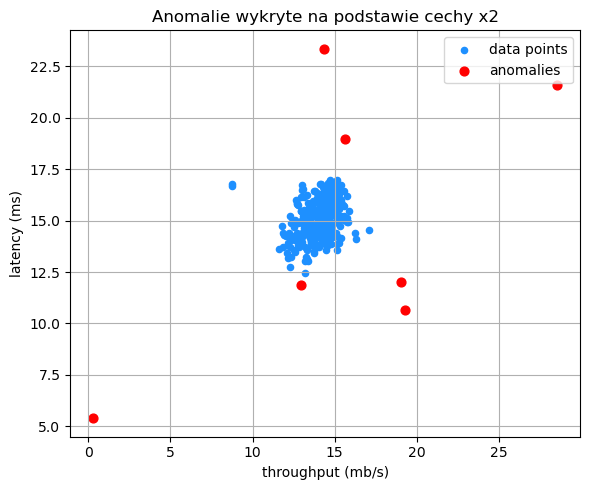

In [32]:
plt.figure(figsize=(6, 5))

# Normalne punkty
plt.scatter(Xval[y_pred2 == 0, 0], Xval[y_pred2 == 0, 1], 
            color='dodgerblue', s=20, label="data points")

# Anomalie wg cechy x2
plt.scatter(Xval[y_pred2 == 1, 0], Xval[y_pred2 == 1, 1], 
            color='red', s=40, label="anomalies")

plt.xlabel("throughput (mb/s)")
plt.ylabel("latency (ms)")
plt.title("Anomalie wykryte na podstawie cechy x2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

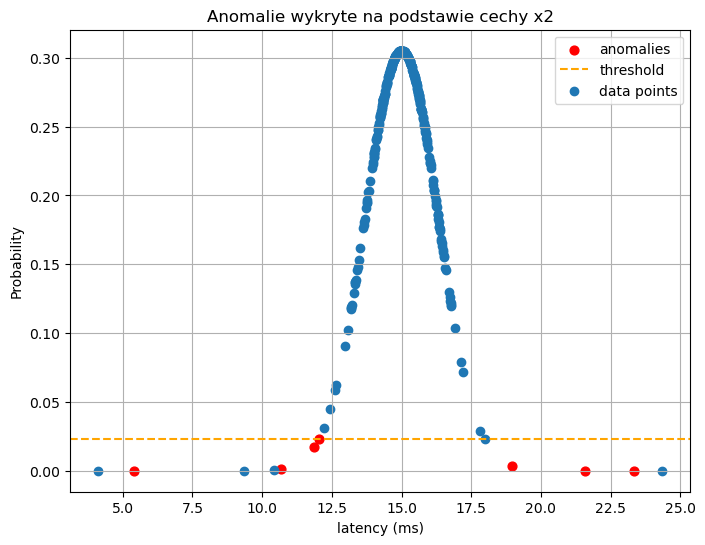

In [33]:
# x2_range = np.linspace(x2.min(), x2.max(), 100)
# pdf_x2 = norm.pdf(x2_range, loc=mu2, scale=sigma2)

# plt.figure(figsize=(8, 6))
# plt.scatter(Xval[y_pred2 == 1, 0], norm.pdf(Xval[y_pred2 == 1, 1], loc=mu2, scale=sigma2), color='red', s=40, label="anomalies")
# plt.plot(Xval[y_pred2 == 1, 0], norm.pdf(Xval[y_pred2 == 1, 1]), color='orange', label='threshold')
# plt.scatter(np.sort(x2), norm.pdf(np.sort(x2), loc=mu2, scale=sigma2), label='data points')
# plt.xlabel('throughput (mb/s)')
# plt.ylabel('Probability')
# plt.title("Anomalie wykryte na podstawie cechy x2")
# plt.grid()
# plt.legend()
# plt.show()

x2_range = np.linspace(x2.min(), x2.max(), 100)
pdf_x2 = norm.pdf(x2_range, loc=mu2, scale=sigma2)

plt.figure(figsize=(8, 6))

# Anomalie na osi X (tu lepiej wziąć x2, czyli kolumna 1) i odpowiadające im wartości PDF
plt.scatter(Xval[y_pred2 == 1, 1], norm.pdf(Xval[y_pred2 == 1, 1], loc=mu2, scale=sigma2), 
            color='red', s=40, label="anomalies")

# Linia progu PDF (np. best_epsilon)
plt.axhline(y=best_epsilon_2, color='orange', linestyle='--', label='threshold')

# Wszystkie dane na tle PDF
plt.scatter(np.sort(x2), norm.pdf(np.sort(x2), loc=mu2, scale=sigma2), label='data points')

plt.xlabel('latency (ms)')  # Zakładam, że x2 to latency
plt.ylabel('Probability')
plt.title("Anomalie wykryte na podstawie cechy x2")
plt.grid()
plt.legend()
plt.show()
